# I'm Something of a Painter Myself

The challenge is to use a GANs model to trick a classifier into believing the generated model is a true Monet painting. The goal is to create 7,000 
to 10,000 Monet-style images. 

## EDA
we will first look at the images and explore the dataset before we build our model. 

In [4]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import random

%matplotlib inline

In [6]:
monet = "gan-getting-started/monet_jpg"
photos = "gan-getting-started/photo_jpg"

In [8]:
# taking a look at some images
def display_random_images(image_dir, num_images=10, rows=2, cols=5):
    image_ids = os.listdir(image_dir)
    np.random.shuffle(image_ids)
    image_ids = image_ids[:num_images]
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
    
    for i, filename in enumerate(image_ids):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        row = i // cols
        col = i % cols
        
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
        axes[row, col].set_title(f'Image {i+1}')
    
    plt.tight_layout()
    plt.show()

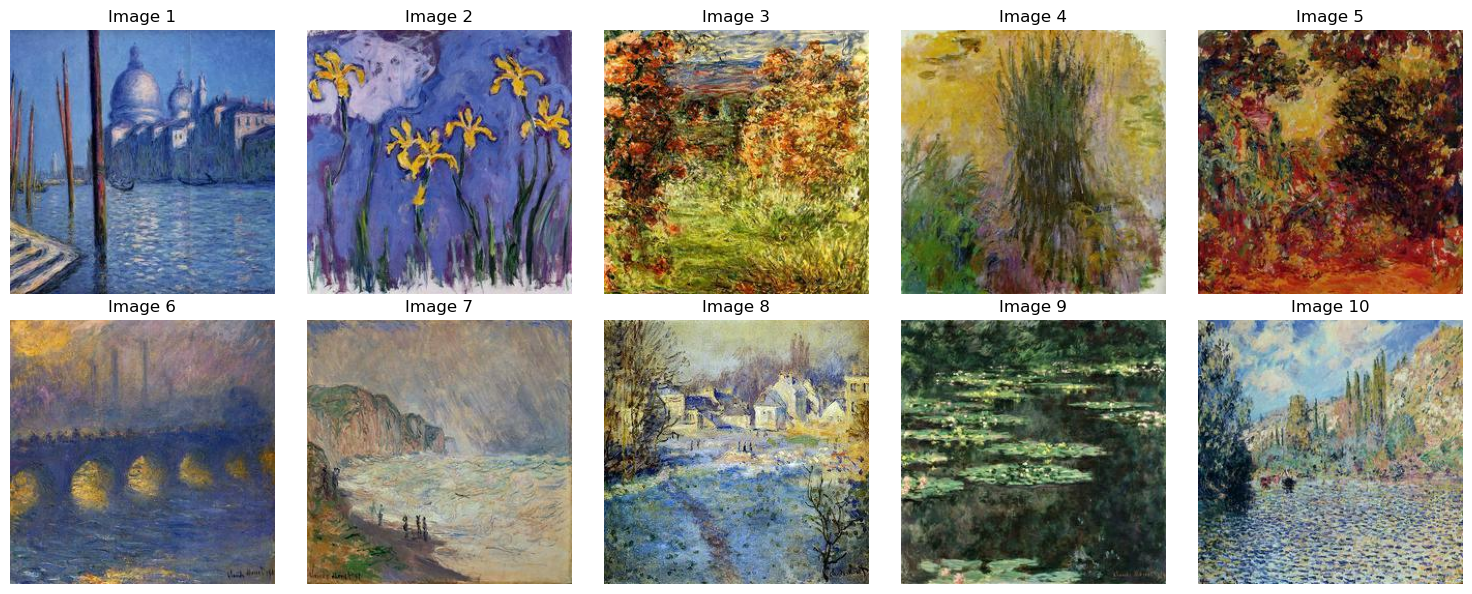

In [10]:
display_random_images(monet)

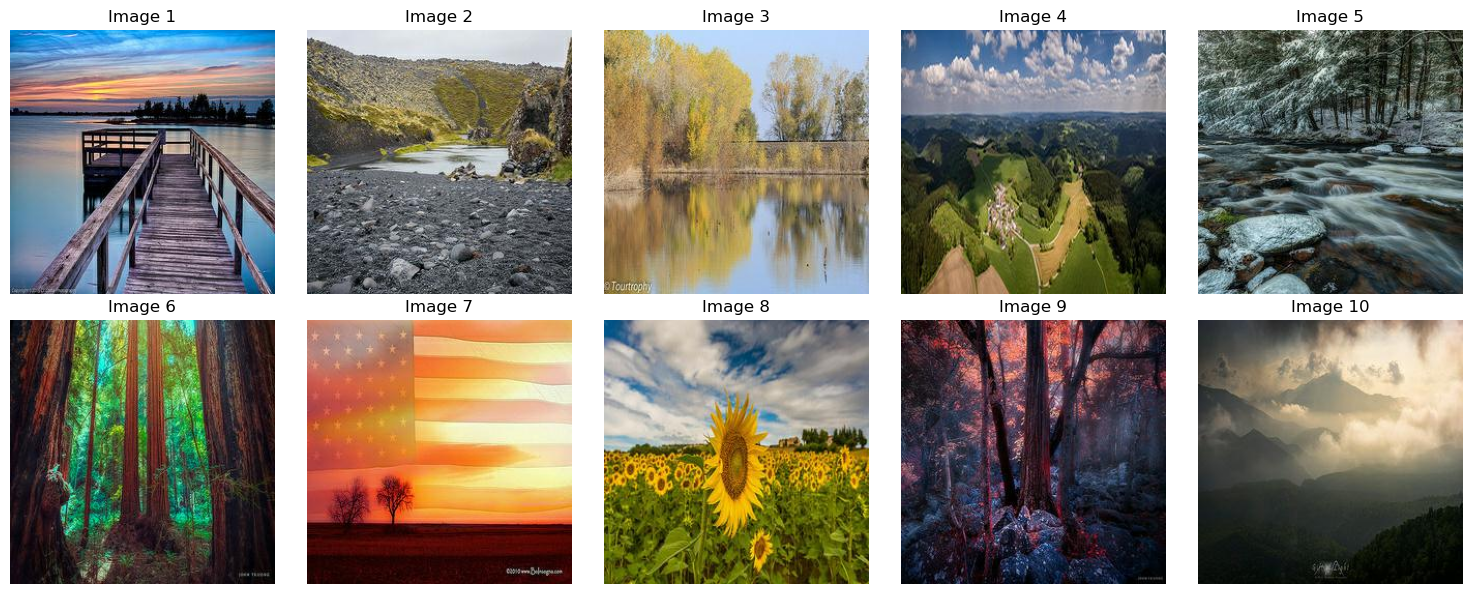

In [12]:
display_random_images(photos)

In [14]:
# function to plot histogram of random images
def plot_random_image_and_histogram(folder_path):
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    if not image_files:
        print("No images found in the folder.")
        return
    
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(folder_path, random_image_file)
    
    image = cv2.imread(random_image_path)
    
    if image is None:
        print(f"Failed to load image: {random_image_path}")
        return
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title(f'Random Image: {random_image_file}')
    plt.axis('off')
    
    channels = ('r', 'g', 'b')
    colors = ('red', 'green', 'blue')
    
    plt.subplot(1, 2, 2)
    
    for i, color in enumerate(colors):
        histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histogram, color=color)
        plt.xlim([0, 256])
    
    plt.title('RGB Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

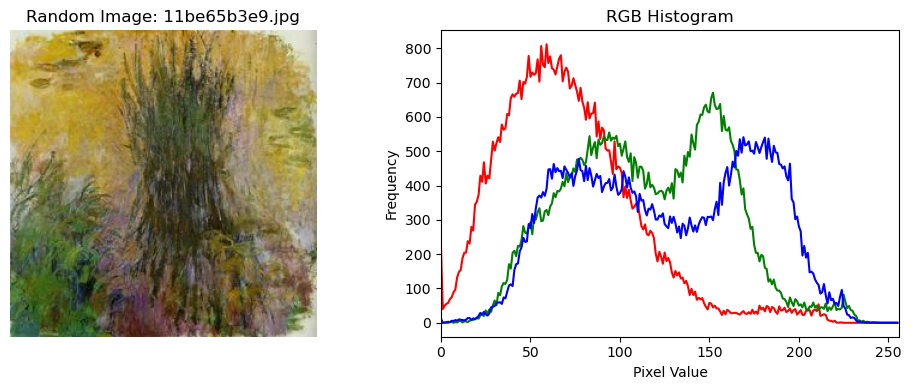

In [16]:
plot_random_image_and_histogram(monet)

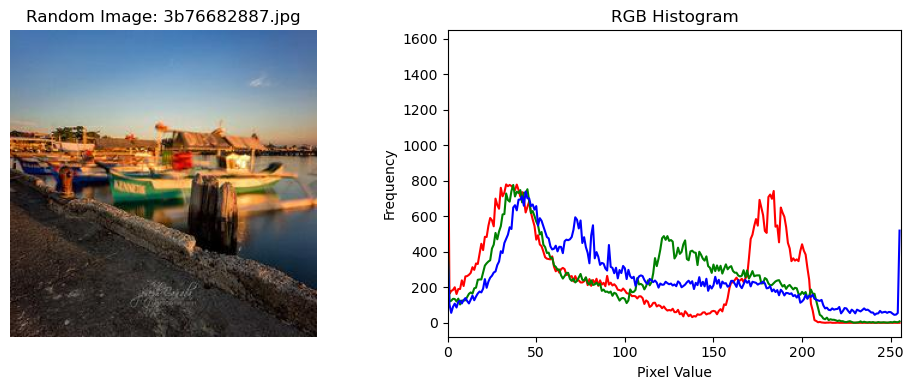

In [18]:
plot_random_image_and_histogram(photos)

### Using PCA to reduce dimensionality and visualize differences in color distributions between Monet and Photos

In [21]:
from sklearn.decomposition import PCA

def load_images(folder_path, limit=None):
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    if limit:
        image_files = image_files[:limit]
    
    images = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        
        if image is not None:
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image_rgb)
    
    return images

def extract_rgb_values(images):
    rgb_values = []
    
    for image in images:
        reshaped_image = image.reshape(-1, 3)
        rgb_values.append(reshaped_image)
    
    return np.vstack(rgb_values)

def apply_pca_and_plot(monet_images, photos_images, n_components=2):
    monet_rgb_values = extract_rgb_values(monet_images)
    photos_rgb_values = extract_rgb_values(photos_images)
    
    all_rgb_values = np.vstack([monet_rgb_values, photos_rgb_values])
    
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(all_rgb_values)
    
    monet_pca_result = pca_result[:len(monet_rgb_values)]
    photos_pca_result = pca_result[len(monet_rgb_values):]
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    
    if n_components == 2:
        axs[0].scatter(monet_pca_result[:, 0], monet_pca_result[:, 1], label='Monet', alpha=0.5, color='blue')
        axs[0].set_title('PCA of Monet Paintings')
        axs[0].set_xlabel('PCA Component 1')
        axs[0].set_ylabel('PCA Component 2')
        axs[0].legend()
        
        axs[1].scatter(photos_pca_result[:, 0], photos_pca_result[:, 1], label='Photos', alpha=0.5, color='green')
        axs[1].set_title('PCA of Regular Photos')
        axs[1].set_xlabel('PCA Component 1')
        axs[1].set_ylabel('PCA Component 2')
        axs[1].legend()
        
    elif n_components == 3:
        from mpl_toolkits.mplot3d import Axes3D
        
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(monet_pca_result[:, 0], monet_pca_result[:, 1], monet_pca_result[:, 2], label='Monet', alpha=0.5, color='blue')
        ax1.set_title('PCA of Monet Paintings')
        ax1.set_xlabel('PCA Component 1')
        ax1.set_ylabel('PCA Component 2')
        ax1.set_zlabel('PCA Component 3')
        ax1.legend()
        
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.scatter(photos_pca_result[:, 0], photos_pca_result[:, 1], photos_pca_result[:, 2], label='Photos', alpha=0.5, color='green')
        ax2.set_title('PCA of Regular Photos')
        ax2.set_xlabel('PCA Component 1')
        ax2.set_ylabel('PCA Component 2')
        ax2.set_zlabel('PCA Component 3')
        ax2.legend()
    
    plt.tight_layout()
    plt.show()

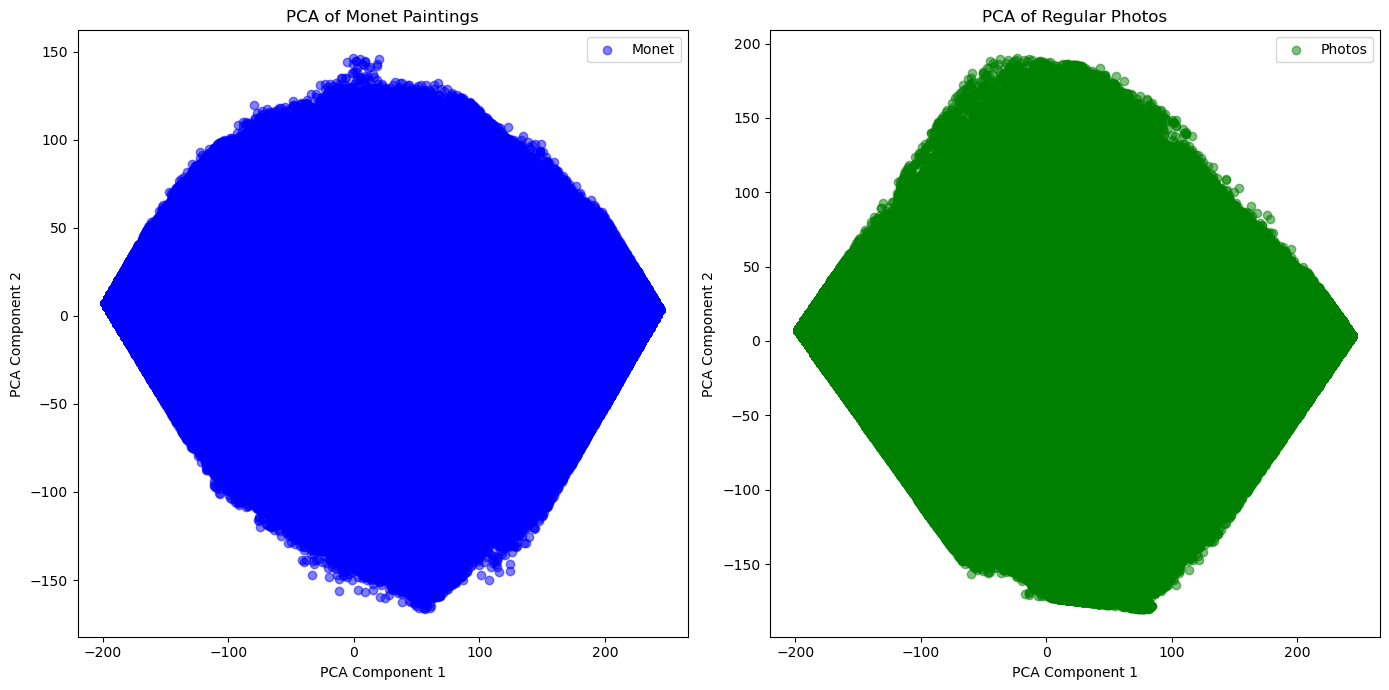

In [23]:
monet_images = load_images(monet, limit=300)
photos_images = load_images(photos, limit=300)

# apply PCA and plot. Using small sample size to avoid kernel dying
apply_pca_and_plot(monet_images, photos_images, n_components=2)

### Results of PCA analysis

Photos, with it's y-axis reaching 200, suggests that they have a greater spread or diversity in the color features captured. 
This makes sense as paintings are restricted to the colors of the paints at hand, whereas the photos capture the entire color spectrum.
We will normalize the images to help with the inbalance. 

## Building Model
I will use a DCGAN model as disscussed in class as it is a powerful architecture for image generating. 
Loss function will be a cross entropy loss for both generator and discriminator

In [48]:
import keras
import tensorflow as tf
from tensorflow import keras

from keras import layers
from keras import ops
import matplotlib.pyplot as plt
import os
import gdown
from zipfile import ZipFile

In [12]:
monet = "gan-getting-started/monet_jpg"

In [14]:
monet_dataset = keras.utils.image_dataset_from_directory(
    monet, label_mode=None, image_size=(256, 256), batch_size=32
)
monet_dataset_normalized = monet_dataset.map(lambda x: x / 255.0)

Found 300 files.


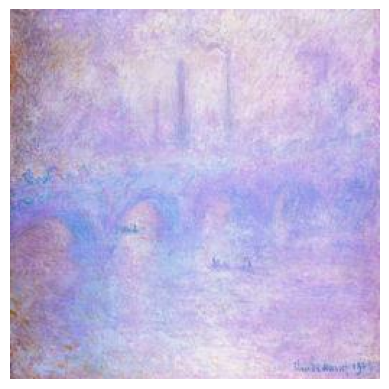

In [16]:
for x in monet_dataset_normalized:
    plt.axis("off")
    plt.imshow(x[0])
    break

In [90]:
for image_batch in monet_dataset_normalized.take(1):  
    images = image_batch

    example_image_shape = images[0].shape
    print("Shape of one example image:", example_image_shape)

Shape of one example image: (256, 256, 3)


2024-06-23 15:26:10.347722: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(256, 256, 3)),
        layers.Conv2D(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 256)  │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 512)    │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 512)    │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       524,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,829,313 (26.05 MB)

 Trainable params: 6,829,313 (26.05 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
latent_dim = 512

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(32 * 32 * 256),
        layers.Reshape((32,32,256)),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)
generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 262144)         │   134,479,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 64, 64, 512)    │     2,097,664 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 64, 64, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 128, 128, 256)  │     2,097,408 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 256, 256, 128)  │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 3)    │         9,603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,208,963 (531.04 MB)

 Trainable params: 139,208,963 (531.04 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(1337)

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = ops.concatenate([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        # Assemble labels that say "all real images"
        misleading_labels = ops.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

In [36]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=512):
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(42)

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = keras.random.normal(
            shape=(self.num_img, self.latent_dim), seed=self.seed_generator
        )
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.utils.array_to_img(generated_images[i])
            img.save("generated_img_%03d_%d.png" % (epoch, i))

In [38]:
epochs = 1

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    monet_dataset_normalized, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)]
)

10/10 ━━━━━━━━━━━━━━━━━━━━ 290s 29s/step - d_loss: 12.4830 - g_loss: 27.9368


In [101]:
# generate images
num_images_to_generate = 9
generated_images = gan.generator.predict(
    np.random.normal(size=(num_images_to_generate, latent_dim))
)

generated_images *= 255
generated_images = generated_images.astype(np.uint8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


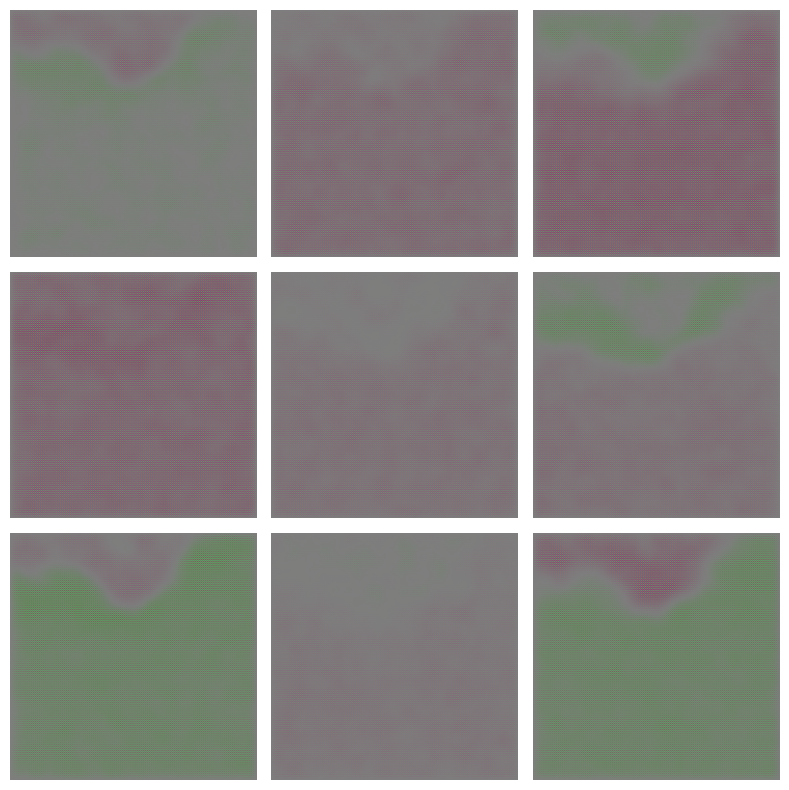

In [105]:
plt.figure(figsize=(8, 8))
for i in range(num_images_to_generate):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(generated_images[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


^^^ images after one epoch do not resemble monet paintings at all. Let's attempt to train further. 

In [108]:
epochs = 100

gan2 = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan2.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan2.fit(
    monet_dataset_normalized, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)]
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 288s 28s/step - d_loss: 13.8380 - g_loss: 12.5404
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 283s 28s/step - d_loss: 2.3447 - g_loss: 26.4113
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3120s 343s/step - d_loss: 14.1133 - g_loss: 95.3743
Epoch 4/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1:52:19 749s/step - d_loss: 2.6406 - g_loss: 208.3185

KeyboardInterrupt: 

### Conclusion and Analysis

Due to computational constraints the second attempt in training the DCGANs model longer failed. 
Key insights taken from this process aside from lack of computer power are as follows:
- Larger dataset necessary
- Photos jpegs should be augmented to simulate monet paintings for additional training data.
- After these changes, further tuning could be implemented. 